# Módulo 3 - Conceitos em Finanças e Macroeconomia

## Libs e APIs

In [62]:
import yfinance as yf
import nasdaqdatalink
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots

In [2]:
key = "YLHxTNuy9_rxmPabAFCm"
nasdaqdatalink.ApiConfig.api_key = key

In [3]:
juros_eua = nasdaqdatalink.get("FRED/EFFR", collapse="monthly")

Banco de Dados (BCB): https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [73]:
def bcb_dados(cod, inicio, fim):
    url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}".format(cod, inicio, fim)
    df = pd.read_json(url)
    df.set_index("data", inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True)
    return df


def bcb_dados_total(cod):
    url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json".format(cod)
    df = pd.read_json(url)
    df.set_index("data", inplace=True)
    df.index = pd.to_datetime(df.index, dayfirst=True)
    return df

## Indicadores

### Selic

In [31]:

selic_aa = bcb_dados(4189, '01/01/2000', '31/12/2023')

In [6]:
selic_aa['diario'] = (selic_aa.valor/100 +1)**(1/252) - 1

In [7]:
selic_aa['soma'] = selic_aa.diario.cumsum() + 1

In [8]:
selic_aa['acumulado'] = selic_aa['soma'].shift(1) * selic_aa['soma']

In [9]:
def plot_graph(df, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df["valor"]))
    fig.update_layout(title=title, width=1000, template="simple_white")
    return fig

In [10]:
plot_graph(selic_aa, "Selic a.a%")

### IPCA

In [38]:
ipca = bcb_dados(13522, '01/01/2000', '31/12/2023')

In [39]:
ipca

,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2023-08-01,4.61
2023-09-01,5.19
2023-10-01,4.82


In [13]:
plot_graph(ipca, 'IPCA Acumulamdo 12m')

### IGPM

In [14]:
igpm = bcb_dados(189, '01/01/2000', '31/12/2023')

In [15]:
igpm

,valor
data,
2000-01-01,1.24
2000-02-01,0.35
2000-03-01,0.15
2000-04-01,0.23
2000-05-01,0.31
...,...
2023-08-01,-0.14
2023-09-01,0.37
2023-10-01,0.50


In [16]:
plot_graph(igpm, 'IGP-M')

### PIB

In [17]:
                     #4385 $
pib = bcb_dados(4380,'01/01/2000', '31/12/2023')

In [18]:
plot_graph(pib, 'PIB Mensal (R$)')

### Dólar

In [19]:
dolar = bcb_dados(3695,'01/01/2000', '31/12/2023')

In [20]:
plot_graph(dolar, 'Dólar')

## Correlação

In [67]:
#Registros Mensais

selic2 = selic_aa.copy()
ipca2 = ipca.copy()
igpm2 = igpm.copy()
pib2 = pib.copy()
dolar2 = dolar.copy()

selic2 = selic2.rename(columns={'valor':'SELIC'})
ipca2 = ipca2.rename(columns={'valor':'IPCA'})
igpm2 = igpm2.rename(columns={'valor':'IGP-M'})
pib2 = pib2.rename(columns={'valor':'PIB'})
dolar2 = dolar2.rename(columns={'valor':'DOLAR'})

<Axes: >

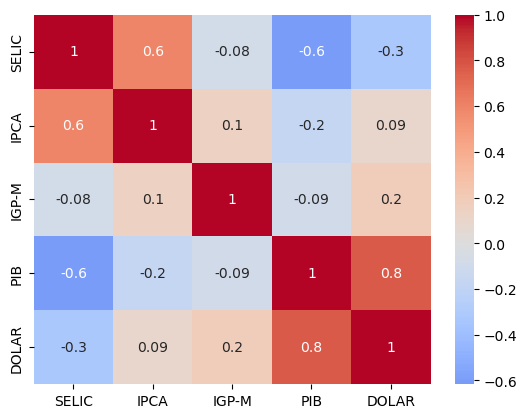

In [64]:
macros = pd.concat([selic2, ipca2, igpm2, pib2, dolar2], axis=1, names = {'valor':'SELIC'})
macros.corr()
sns.heatmap(macros.corr(), cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=macros.columns,
            yticklabels=macros.columns)

### Selic x IPCA

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(name= 'SELIC', x=macros.index, y=macros['SELIC']))
fig.add_trace(go.Scatter(name= 'IPCA', x=macros.index, y=macros['IPCA']))
fig.update_layout(template="simple_white", title_text = 'SELIC x IPCA')

### PIB x Dólar

In [65]:
fig = make_subplots(cols=1, rows=1, specs=[[{'secondary_y':True}]])
fig.add_trace(go.Scatter(name= 'PIB', x=macros.index, y=macros['PIB']), col=1, row=1)
fig.add_trace(go.Scatter(name=  'Dólar', x=macros.index, y=macros['DOLAR']), col=1, row=1, secondary_y=True)
fig.update_layout(template="simple_white", title_text = 'PIB x DOLAR')

## Ativos correlacionados Indicadores

In [116]:
selic_d = bcb_dados(432, '31/12/2014', '31/12/2022')
ipca_d = bcb_dados(13522, '31/12/2014', '31/12/2022')
pib_d = bcb_dados(4380, '31/12/2014', '31/12/2022')
dolar_d = bcb_dados(10813, '31/12/2014', '31/12/2022')

In [118]:
selic_d = selic_d.rename(columns={'valor':'SELIC'})
ipca_d = ipca_d.rename(columns={'valor':'IPCA'})
pib_d = pib_d.rename(columns={'valor':'PIB'})
dolar_d = dolar_d.rename(columns={'valor':'DOLAR'})

In [127]:
macros2 = pd.concat([selic_d, ipca_d, pib_d, dolar_d], axis=1)
macros2.ffill(inplace=True)
macros2.rename_axis('Date', inplace=True)

### FIIs

In [121]:
lista_fiis = ['HGLG11.SA', 'KNCR11.SA', 'BRCR11.SA']
fiis = yf.download(lista_fiis, start='2015-01-01', end='2022-12-31')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [129]:
comp_fiis = pd.merge(fiis, macros2, how='inner', on = 'Date')

<Axes: >

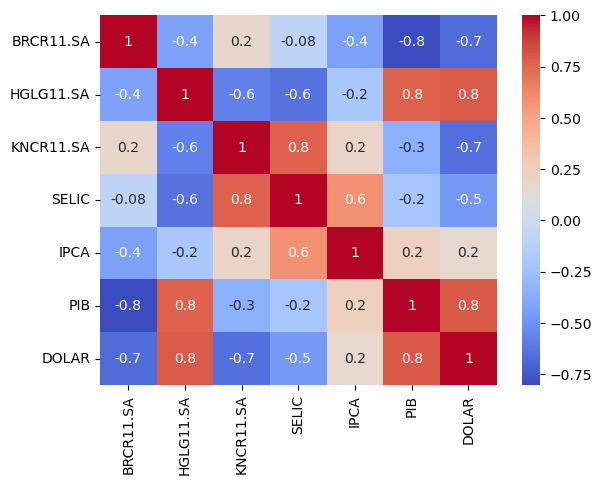

In [137]:
sns.heatmap(comp_fiis.corr(), cmap='coolwarm', fmt='.1g', annot=True)

In [141]:
fig = make_subplots(cols=1, rows=1, specs=[[{'secondary_y':True}]])
fig.add_trace(go.Scatter(name= 'HGLG11.SA', x=comp_fiis.index, y=comp_fiis['HGLG11.SA']))
fig.add_trace(go.Scatter(name= 'DOLAR', x=comp_fiis.index, y=comp_fiis['DOLAR']), secondary_y=True)
fig.update_layout(template="simple_white", title_text = 'HGLG11.SA x DOLAR')

### Ações

In [151]:
lista_acoes = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA']
acoes = yf.download(lista_acoes, start='2015-01-01', end='2022-12-31')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [152]:
comp_acoes = pd.merge(acoes, macros2, how='inner', on = 'Date')

In [162]:
comp_acoes_normal = comp_acoes[['VALE3.SA','PETR4.SA','ITUB4.SA','SELIC']] / comp_acoes[['VALE3.SA','PETR4.SA','ITUB4.SA', 'SELIC']].iloc[0]

In [167]:
comp_acoes_normal

,VALE3.SA,PETR4.SA,ITUB4.SA,SELIC
Date,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.984962,0.914530,1.005025,1.000000
2015-01-06,1.024436,0.884615,1.021283,1.000000
2015-01-07,1.062030,0.926282,1.058232,1.000000
2015-01-08,1.073308,0.986111,1.074786,1.000000
...,...,...,...,...
2022-12-23,6.443210,5.688357,1.929418,1.170213
2022-12-26,6.502178,5.647597,1.891121,1.170213
2022-12-27,6.657437,5.686093,1.880398,1.170213


In [169]:
fig = go.Figure()

fig.add_trace(go.Scatter(name= 'VALE3.SA', x=comp_acoes_normal.index, y=comp_acoes_normal['VALE3.SA']))
fig.add_trace(go.Scatter(name= 'PETR4.SA', x=comp_acoes_normal.index, y=comp_acoes_normal['PETR4.SA']))
fig.add_trace(go.Scatter(name= 'ITUB4.SA', x=comp_acoes_normal.index, y=comp_acoes_normal['ITUB4.SA']))
fig.add_trace(go.Scatter(name= 'SELIC', x=comp_acoes_normal.index, y=comp_acoes_normal['SELIC']))

fig.update_layout(template="simple_white", title_text = 'Ações x SELIC 2015-2022')